# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [1]:
using Pkg
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")

   Updating registry at `C:\Users\szady\.julia\registries\General`
  Resolving package versions...
  Installed CommonSolve ─ v0.2.0
  Installed Roots ─────── v1.0.9
Updating `C:\Users\szady\.julia\environments\v1.5\Project.toml`
  [f2b01f46] + Roots v1.0.9
Updating `C:\Users\szady\.julia\environments\v1.5\Manifest.toml`
  [38540f10] + CommonSolve v0.2.0
  [f2b01f46] + Roots v1.0.9
  Resolving package versions...
  Installed DiffRules ──────────── v1.0.2
  Installed OpenSpecFun_jll ────── v0.5.3+4
  Installed DiffResults ────────── v1.0.3
  Installed ForwardDiff ────────── v0.10.18
  Installed CommonSubexpressions ─ v0.3.0
  Installed SpecialFunctions ───── v1.3.0
  Installed ChainRulesCore ─────── v0.9.42
Updating `C:\Users\szady\.julia\environments\v1.5\Project.toml`
  [f6369f11] + ForwardDiff v0.10.18
Updating `C:\Users\szady\.julia\environments\v1.5\Manifest.toml`
  [d360d2e6] + ChainRulesCore v0.9.42
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.0.3
  [b5

In [2]:
using Roots  
using Plots
using ForwardDiff

┌ Info: Precompiling Roots [f2b01f46-fcfa-551c-844a-d8ac1e96c665]
└ @ Base loading.jl:1278
┌ Info: Precompiling ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1278


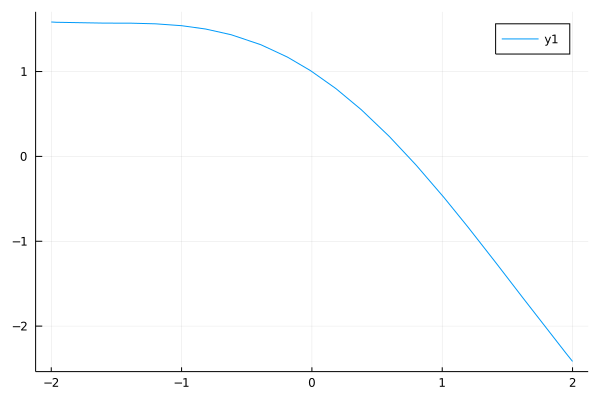

In [3]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [4]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151609
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.5004882812500000,  1.0000000000000000)
(a_11, b_11) = ( 0.5004882812500000,  0.7502441406250000)
(a_12, b_12) = ( 0.6253662109375000,  

0.7390851332151607

In [5]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151609
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.5004882812500000,  1.0000000000000000)
(a_11, b_11) = ( 0.5004882812500000,  0.7502441406250000)
(a_12, b_12) = ( 0.6253662109375000,  

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [6]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [7]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [8]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.1415926535897936, -3.216245299353273e-16)

In [9]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [10]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [11]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations: 8
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.6850733573260451)
(a_2, b_2) = ( 1.0000000000000000,  0.7362989976136540)
(a_3, b_3) = ( 0.7362989976136540,  0.7390895164441823)
(a_4, b_4) = ( 0.7390895164441823,  0.7390851305146882)
(a_5, b_5) = ( 0.7390895164441823,  0.7390851332151580)
(a_6, b_6) = ( 0.7390895164441823,  0.7390851332151607)



0.7390851332151607

In [12]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations: 8
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 1.0000000000000000,  0.6850733573260451)
(a_2, b_2) = ( 1.0000000000000000,  0.7362989976136540)
(a_3, b_3) = ( 0.7362989976136540,  0.7390895164441823)
(a_4, b_4) = ( 0.7390895164441823,  0.7390851305146882)
(a_5, b_5) = ( 0.7390895164441823,  0.7390851332151580)
(a_6, b_6) = ( 0.7390895164441823,  0.7390851332151607)



0.7390851332151607

### 2. Metody korzytające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [13]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

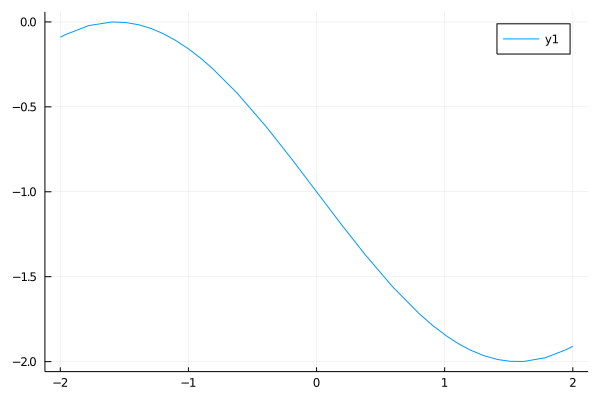

In [14]:
plot(D(f), -2,2)

In [15]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations: 11
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  1.0000000000000000,	 fx_1 = -0.4596976941318602
x_2 =  0.7503638678402439,	 fx_2 = -0.0189230738221174
x_3 =  0.7391128909113617,	 fx_3 = -0.0000464558989908
x_4 =  0.7390851333852840,	 fx_4 = -0.0000000002847206
x_5 =  0.7390851332151607,	 fx_5 =  0.0000000000000000



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [16]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.6666666666666666,	 fx_1 =  0.1192205941102814
x_2 =  0.7390392624463102,	 fx_2 =  0.0000767690929604
x_3 =  0.7390851332151495,	 fx_3 =  0.0000000000000187
x_4 =  0.7390851332151606,	 fx_4 =  0.0000000000000001



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [17]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851344824166
* Algorithm: Roots.Secant(), with possible bracketing with Roots.AlefeldPotraShi()
* iterations: 2
* function evaluations: 11
* Note: Exact zero found. Bracketing used over (0.0, 0.9999969722835389), those steps not shown. 

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [18]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Secant()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835389,	 fx_1 = -0.4596921186823234
x_2 =  0.6850738998209052,	 fx_2 =  0.0892983907342113
x_3 =  0.7362990541607766,	 fx_3 =  0.0046599445167859
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851121285389,	 fx_5 =  0.0000000352908237
x_6 =  0.7390851332150014,	 fx_6 =  0.0000000000002666
x_7 =  0.7390851332151607,	 fx_7 =  0.0000000000000000



0.7390851332151607

In [19]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [20]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [21]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.9999969722835389,	 fx_1 = -0.4596921186823234
x_2 =  0.6850738998209052,	 fx_2 =  0.0892983907342113
x_3 =  0.7362990541607766,	 fx_3 =  0.0046599445167859
x_4 =  0.7391193608624661,	 fx_4 = -0.0000572842351875
x_5 =  0.7390851330409081,	 fx_5 =  0.0000000002916313
x_6 =  0.7390851332151607,	 fx_6 =  0.0000000000000000



0.7390851332151607

In [22]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 2
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.7369285852997423,	 fx_1 =  0.0036075047762146
x_2 =  0.7390851332151607,	 fx_2 =  0.0000000000000000



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

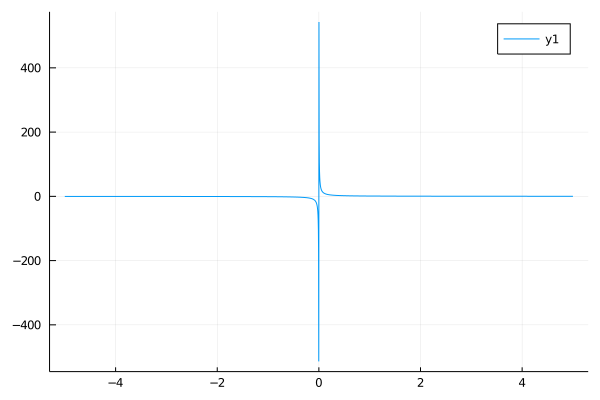

In [23]:
plot(x -> 1/x)

In [24]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = (-1.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-0.0000000000000000,  0.0000000000000000)
(a_2, b_2) = (-0.0000000000000000,  0.0000000000000000)
(a_3, b_3) = (-0.0000000000000000,  0.0000000000000000)
(a_4, b_4) = (-0.0000000000000000,  0.0000000000000000)
(a_5, b_5) = (-0.0000000000000000,  0.0000000000000000)
(a_6, b_6) = (-0.0000000000000000,  0.0000000000000000)
(a_7, b_7) = (-0.0000000000000000,  0.0000000000000000)
(a_8, b_8) = (-0.0000000000000000,  0.0000000000000000)
(a_9, b_9) = (-0.0000000000000000,  0.0000000000000000)
(a_10, b_10) = (-0.0000000000000000,  0.0000000000000000)
(a_11, b_11) = (-0.0000000000000000,  0.0000000000000000)
(a_12, b_12) = (-0.0000000000000000,  0.0000000000000000)
(a_13, b_13) = (-0.0000

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [25]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Array{Float64,1}:
 0.0
 3.0

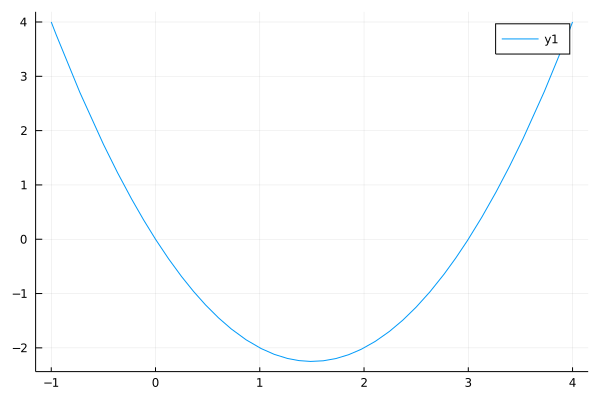

In [26]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://github.com/JuliaMath/Roots.jl/blob/master/doc/roots.ipynb

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

Wybrane metody poszukiwania pierwiastków :

*  Metoda bisekcji

*  Metoda Halleya

*  Metoda siecznych

### (Podpunkt 1)

### Pierwsza funkcja - x^3

In [147]:
D(f) = x->ForwardDiff.derivative(f, float(x))
DD(f) = x->ForwardDiff.derivative(D(f), float(x))

DD (generic function with 1 method)

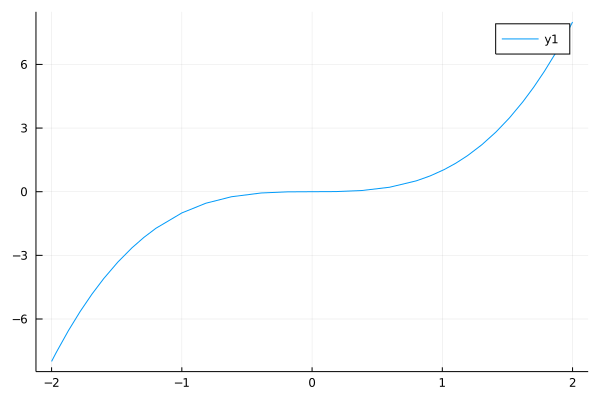

In [88]:
a(x) = x^3
plot(a,-2,2)

In [193]:
x = find_zero(a, (-1, 2),verbose=true)  #Bisekcja

Results of univariate zero finding:

* Converged to: 2.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-1.0000000000000000,  2.0000000000000000)



0.0

In [194]:
iszero(a(0.0))

true

In [148]:
find_zero((a, D(a), DD(a)), -0.2, Roots.Halley(), verbose=true)  # Halley

Results of univariate zero finding:

* Converged to: -6.103515625000002e-6
* Algorithm: Roots.Halley()
* iterations: 15
* function evaluations: 48
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -0.2000000000000000,	 fx_0 = -0.0080000000000000
x_1 = -0.1000000000000000,	 fx_1 = -0.0010000000000000
x_2 = -0.0500000000000000,	 fx_2 = -0.0001250000000000
x_3 = -0.0250000000000000,	 fx_3 = -0.0000156250000000
x_4 = -0.0125000000000000,	 fx_4 = -0.0000019531250000
x_5 = -0.0062500000000000,	 fx_5 = -0.0000002441406250
x_6 = -0.0031250000000000,	 fx_6 = -0.0000000305175781
x_7 = -0.0015625000000000,	 fx_7 = -0.0000000038146973
x_8 = -0.0007812500000000,	 fx_8 = -0.0000000004768372
x_9 = -0.0003906250000000,	 fx_9 = -0.0000000000596046
x_10 = -0.0001953125000000,	 fx_10 = -0.0000000000074506
x_11 = -0.0000976562500000,	 fx_11 = -0.0000000000009313
x_12 = -0.0000488281250000,	 fx_12 = -0.0000000000001164
x_13 = -0.0000244140625000,	 fx_13 = -0.00000000000001

-6.103515625000002e-6

In [195]:
iszero(a(-6.103515625000002e-6))

false

In [93]:
x = find_zero(a, -0.2, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: -7.320139035701368e-6
* Algorithm: Roots.Secant()
* iterations: 36
* function evaluations: 38
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -0.2000000000000000,	 fx_0 = -0.0080000000000000
x_1 = -0.1333313148053338,	 fx_1 = -0.0023702627171735
x_2 = -0.1052621010958520,	 fx_2 = -0.0011663156513010
x_3 = -0.0780702384325595,	 fx_3 = -0.0004758351466419
x_4 = -0.0593313401283342,	 fx_4 = -0.0002088586535085
x_5 = -0.0446716934226751,	 fx_5 = -0.0000891450531593
x_6 = -0.0337553482366496,	 fx_6 = -0.0000384616381987
x_7 = -0.0254713658072281,	 fx_7 = -0.0000165255795486
x_8 = -0.0192306088508122,	 fx_8 = -0.0000071117929345
x_9 = -0.0145159310014037,	 fx_9 = -0.0000030586845233
x_10 = -0.0109579920795677,	 fx_10 = -0.0000013158092847
x_11 = -0.0082718737826161,	 fx_11 = -0.0000005659938304
x_12 = -0.0062442730242616,	 fx_12 = -0.0000002434701098
x_13 = -0.0047136563663964,	 fx_13 = -0.00000010473063

-7.320139035701368e-6

In [196]:
iszero(a(-7.320139035701368e-6))

false

### Druga funkcja - ( x + 3 ) * ( x - 1 )^2

In [94]:
b(x) = (x+3)*(x-1)*(x-1)

b (generic function with 1 method)

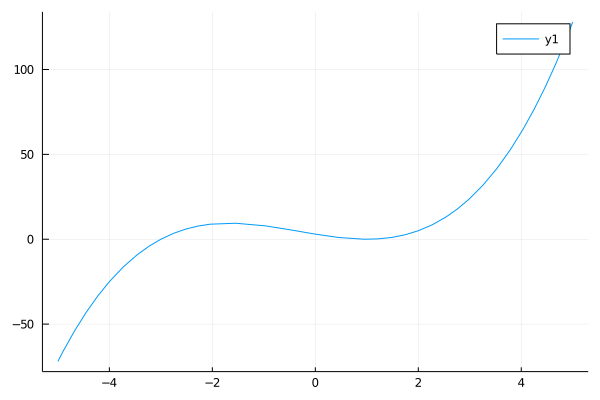

In [95]:
plot(x -> (x+3)*(x-1)*(x-1))

In [102]:
x = find_zero(b, (-4, 2),verbose=true)

Results of univariate zero finding:

* Converged to: -2.999999999999999
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-4.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-4.0000000000000000, -0.0000000000000000)
(a_2, b_2) = (-4.0000000000000000, -0.0000000000000000)
(a_3, b_3) = (-4.0000000000000000, -0.0000000000000000)
(a_4, b_4) = (-4.0000000000000000, -0.0000000000000000)
(a_5, b_5) = (-4.0000000000000000, -0.0000000009167707)
(a_6, b_6) = (-4.0000000000000000, -0.0000605583190918)
(a_7, b_7) = (-4.0000000000000000, -0.0155639648437500)
(a_8, b_8) = (-4.0000000000000000, -0.2495117187500000)
(a_9, b_9) = (-4.0000000000000000, -0.9990234375000000)
(a_10, b_10) = (-4.0000000000000000, -1.9990234375000000)
(a_11, b_11) = (-4.0000000000000000, -2.9990234375000000)
(a_12, b_12) = (-3.4995117187500000, -

-3.0

In [197]:
iszero(b(-3.0))

true

In [149]:
find_zero((b, D(b), DD(b)), 0.0, Roots.Halley(), verbose=true)  # Halley

Results of univariate zero finding:

* Converged to: 0.9999999928866423
* Algorithm: Roots.Halley()
* iterations: 17
* function evaluations: 54
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  3.0000000000000000
x_1 =  0.6818181818181818,	 fx_1 =  0.3727460555972954
x_2 =  0.8966140054160272,	 fx_2 =  0.0416495973588628
x_3 =  0.9658317402597549,	 fx_3 =  0.0046299894774079
x_4 =  0.9886429104886695,	 fx_4 =  0.0005144690517210
x_5 =  0.9962178828957884,	 fx_5 =  0.0000571635382069
x_6 =  0.9987396915170502,	 fx_6 =  0.0000063515080432
x_7 =  0.9995799412892999,	 fx_7 =  0.0000007057231627
x_8 =  0.9998599853309650,	 fx_8 =  0.0000000784136853
x_9 =  0.9999533289882072,	 fx_9 =  0.0000000087126317
x_10 =  0.9999844430565740,	 fx_10 =  0.0000000009680702
x_11 =  0.9999948143589140,	 fx_11 =  0.0000000001075634
x_12 =  0.9999982714537183,	 fx_12 =  0.0000000000119515
x_13 =  0.9999994238179891,	 fx_13 =  0.0000000000013279


0.9999999928866423

In [198]:
iszero(b(0.9999999928866423))

false

In [105]:
x = find_zero(b, 0.0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.9999999886120837
* Algorithm: Roots.Secant()
* iterations: 37
* function evaluations: 39
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  3.0000000000000000
x_1 =  0.6000007266660472,	 fx_1 =  0.5759980234698301
x_2 =  0.7425745512694462,	 fx_2 =  0.2480124125937801
x_3 =  0.8503843973116693,	 fx_3 =  0.0861901946539245
x_4 =  0.9078063739369214,	 fx_4 =  0.0332150438388517
x_5 =  0.9438095460199841,	 fx_5 =  0.0124520545821521
x_6 =  0.9654014978514989,	 fx_6 =  0.0047468090469502
x_7 =  0.9787031988585466,	 fx_7 =  0.0018045557116510
x_8 =  0.9868614564222180,	 fx_8 =  0.0006882173165493
x_9 =  0.9918909834480951,	 fx_9 =  0.0002624913800521
x_10 =  0.9949920571127490,	 fx_10 =  0.0001001923711845
x_11 =  0.9969064491096398,	 fx_11 =  0.0000382506229863
x_12 =  0.9980886354161476,	 fx_12 =  0.0000146062754735
x_13 =  0.9988189299968956,	 fx_13 =  0.0000055780579033


0.9999999886120837

In [199]:
iszero(b(0.9999999886120837))

false

### Trzecia funkcja - x * exp ( - x ). 

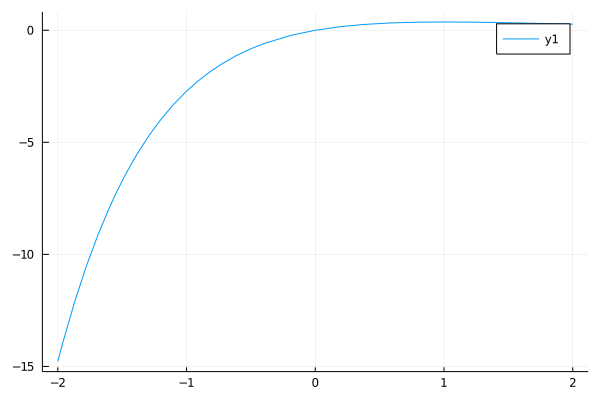

In [109]:
c(x) = x*exp(-x)
plot(c,-2,2)

In [112]:
x = find_zero(c, (-2, 3),verbose=true)

Results of univariate zero finding:

* Converged to: 3.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-2.0000000000000000,  3.0000000000000000)



0.0

In [200]:
iszero(c(0.0))

true

In [150]:
x = find_zero((c, D(c), DD(c)), -0.0001, Roots.Halley(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Halley()
* iterations: 2
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -0.0001000000000000,	 fx_0 = -0.0001000100005000
x_1 = -0.0000000000004999,	 fx_1 = -0.0000000000004999
x_2 =  0.0000000000000000,	 fx_2 =  0.0000000000000000



0.0

In [201]:
iszero(c(0.0))

true

In [124]:
x = find_zero(c, -0.0001, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: -8.823424926384475e-21
* Algorithm: Roots.Secant()
* iterations: 3
* function evaluations: 5
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -0.0001000000000000,	 fx_0 = -0.0001000100005000
x_1 = -0.0000000093935436,	 fx_1 = -0.0000000093935437
x_2 = -0.0000000000009393,	 fx_2 = -0.0000000000009393
x_3 = -0.0000000000000000,	 fx_3 = -0.0000000000000000



-8.823424926384475e-21

In [202]:
iszero(c(-8.823424926384475e-21))

false

### Czwarta funkcja - sin(x) - x / 2.

In [130]:
d(x) =  sin(x) -x/2

d (generic function with 1 method)

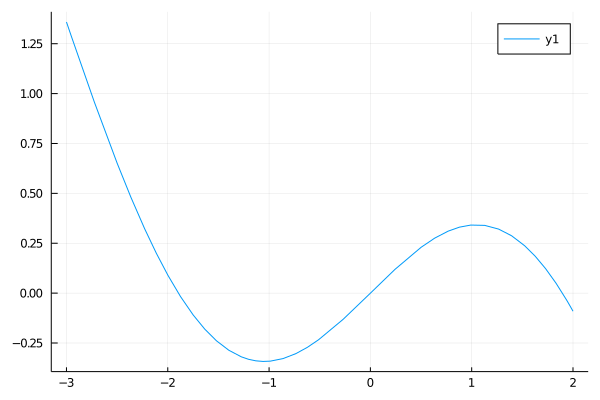

In [132]:
plot(d,-3,2)

In [135]:
x = find_zero(d, (-2, -1),verbose=true)

Results of univariate zero finding:

* Converged to: -1.89549426703398
* Algorithm: Roots.BisectionExact()
* iterations: 49
* function evaluations: 51
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-2.0000000000000000, -1.0000000000000000)
(a_1, b_1) = (-2.0000000000000000, -1.5000000000000000)
(a_2, b_2) = (-2.0000000000000000, -1.7500000000000000)
(a_3, b_3) = (-2.0000000000000000, -1.8750000000000000)
(a_4, b_4) = (-1.9375000000000000, -1.8750000000000000)
(a_5, b_5) = (-1.9062500000000000, -1.8750000000000000)
(a_6, b_6) = (-1.9062500000000000, -1.8906250000000000)
(a_7, b_7) = (-1.8984375000000000, -1.8906250000000000)
(a_8, b_8) = (-1.8984375000000000, -1.8945312500000000)
(a_9, b_9) = (-1.8964843750000000, -1.8945312500000000)
(a_10, b_10) = (-1.8955078125000000, -1.8945312500000000)
(a_11, b_11) = (-1.8955078125000000, -1.8950195312500000)
(a_12, b_12) = (-1.8955078125000000, -1

-1.895494267033981

In [136]:
iszero(d(-1.895494267033981))

true

In [151]:
x = find_zero((d, D(d), DD(d)), -2, Roots.Halley(), verbose=true)

Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Roots.Halley()
* iterations: 3
* function evaluations: 12
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -2.0000000000000000,	 fx_0 =  0.0907025731743183
x_1 = -1.8958799569587472,	 fx_1 =  0.0003159592245435
x_2 = -1.8954942670568975,	 fx_2 =  0.0000000000187692
x_3 = -1.8954942670339809,	 fx_3 =  0.0000000000000000



-1.895494267033981

In [138]:
iszero(d(-1.895494267033981))

true

In [139]:
x = find_zero(d, -2, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Roots.Secant()
* iterations: 5
* function evaluations: 7
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -2.0000000000000000,	 fx_0 =  0.0907025731743183
x_1 = -1.9009952966817181,	 fx_1 =  0.0045197983431743
x_2 = -1.8958030608213483,	 fx_2 =  0.0002529542511552
x_3 = -1.8954952459339147,	 fx_3 =  0.0000008017415487
x_4 = -1.8954942672088371,	 fx_4 =  0.0000000001432111
x_5 = -1.8954942670339809,	 fx_5 =  0.0000000000000000



-1.895494267033981

In [140]:
iszero(d(-1.895494267033981))

true

# Piąta funkcja - 2 * x - exp ( - x )

In [141]:
e(x) =  2*x - exp(-x)

e (generic function with 1 method)

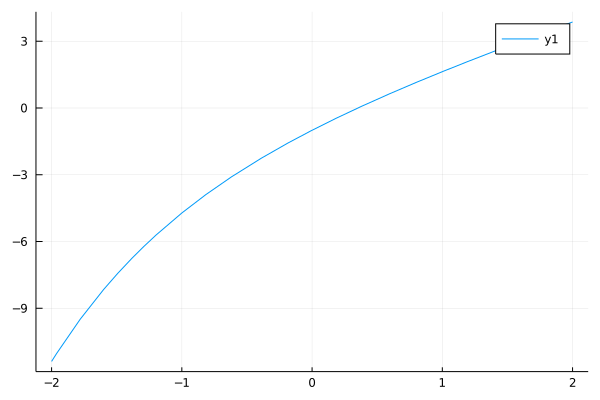

In [142]:
plot(e,-2,2)

In [144]:
x = find_zero(e, (-1, 1),verbose=true)

Results of univariate zero finding:

* Converged to: 0.3517337112491959
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.2504882812500000,  0.5004882812500000)
(a_11, b_11) = ( 0.2504882812500000,  0.3753662109375000)
(a_12, b_12) = ( 0.3129272460937500,  

0.35173371124919584

In [145]:
iszero(e(0.35173371124919584))

true

In [152]:
x = find_zero((e, D(e), DD(e)), -2, Roots.Halley(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Halley()
* iterations: 3
* function evaluations: 12
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -2.0000000000000000,	 fx_0 = -11.3890560989306504
x_1 =  0.3207251373458870,	 fx_1 = -0.0841723954636746
x_2 =  0.3517345043790102,	 fx_2 =  0.0000021442003936
x_3 =  0.3517337112491958,	 fx_3 =  0.0000000000000000



0.35173371124919584

In [158]:
iszero(e(0.35173371124919584))

true

In [154]:
x = find_zero(e, -2, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Secant()
* iterations: 8
* function evaluations: 10
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -2.0000000000000000,	 fx_0 = -11.3890560989306504
x_1 = -0.7869831517948389,	 fx_1 = -3.7707254341826011
x_2 = -0.1865952606805741,	 fx_2 = -1.5783299403801831
x_3 =  0.2456306707565764,	 fx_3 = -0.2909497234913331
x_4 =  0.3433143337394761,	 fx_4 = -0.0227865159030187
x_5 =  0.3516147652566965,	 fx_5 = -0.0003215715923370
x_6 =  0.3517335807295133,	 fx_6 = -0.0000003528557156
x_7 =  0.3517337112471760,	 fx_7 = -0.0000000000054606
x_8 =  0.3517337112491958,	 fx_8 =  0.0000000000000000



0.35173371124919584

In [156]:
iszero(e(0.35173371124919584))

true

# Szósta funkcja - (x-1)^7

In [159]:
f(x) = (x-1)*(x-1)*(x-1)*(x-1)*(x-1)*(x-1)*(x-1)

f (generic function with 1 method)

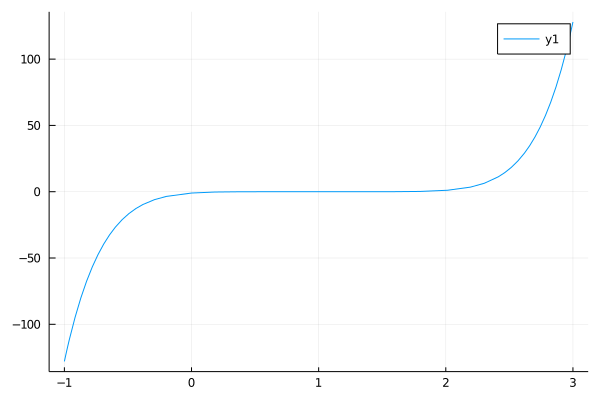

In [164]:
plot(f,-1,3)

In [163]:
f(0.75)

-6.103515625e-5

In [165]:
x = find_zero(f, (-1, 3),verbose=true)

Results of univariate zero finding:

* Converged to: 1.0000000000000002
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  3.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  3.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  3.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  3.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  3.0000000000000000)
(a_5, b_5) = ( 0.0000000006912160,  3.0000000000000000)
(a_6, b_6) = ( 0.0000455379486084,  3.0000000000000000)
(a_7, b_7) = ( 0.0116882324218750,  3.0000000000000000)
(a_8, b_8) = ( 0.1872558593750000,  3.0000000000000000)
(a_9, b_9) = ( 0.7495117187500000,  3.0000000000000000)
(a_10, b_10) = ( 0.7495117187500000,  1.4995117187500000)
(a_11, b_11) = ( 0.9996337890625000,  1.4995117187500000)
(a_12, b_12) = ( 0.9996337890625000,  

1.0

In [167]:
iszero(f(1.0))

true

In [172]:
x = find_zero((f, D(f), DD(f)), 0.5, Roots.Halley(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.993318269494921
* Algorithm: Roots.Halley()
* iterations: 15
* function evaluations: 48
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.5000000000000000,	 fx_0 = -0.0078125000000000
x_1 =  0.6250000000000000,	 fx_1 = -0.0010428428649902
x_2 =  0.7187500000000000,	 fx_2 = -0.0001392027188558
x_3 =  0.7890625000000000,	 fx_3 = -0.0000185813199547
x_4 =  0.8417968750000000,	 fx_4 = -0.0000024803068079
x_5 =  0.8813476562500000,	 fx_5 = -0.0000003310809930
x_6 =  0.9110107421875000,	 fx_6 = -0.0000000441939778
x_7 =  0.9332580566406250,	 fx_7 = -0.0000000058991839
x_8 =  0.9499435424804688,	 fx_8 = -0.0000000007874460
x_9 =  0.9624576568603516,	 fx_9 = -0.0000000001051114
x_10 =  0.9718432426452637,	 fx_10 = -0.0000000000140307
x_11 =  0.9788824319839478,	 fx_11 = -0.0000000000018729
x_12 =  0.9841618239879608,	 fx_12 = -0.0000000000002500
x_13 =  0.9881213679909706,	 fx_13 = -0.0000000000000334
x

0.993318269494921

In [173]:
iszero(f(0.993318269494921))

false

In [175]:
x = find_zero(f, 0.5, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: 0.9932790240219055
* Algorithm: Roots.Secant()
* iterations: 40
* function evaluations: 42
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.5000000000000000,	 fx_0 = -0.0078125000000000
x_1 =  0.5714311666731510,	 fx_1 = -0.0026554864736298
x_2 =  0.6082130164639654,	 fx_2 = -0.0014169353077769
x_3 =  0.6502924259311232,	 fx_3 = -0.0006396394915962
x_4 =  0.6849197216375301,	 fx_4 = -0.0003082822665707
x_5 =  0.7171356517557312,	 fx_5 = -0.0001448930291823
x_6 =  0.7457046308229266,	 fx_6 = -0.0000687652713342
x_7 =  0.7715106397324999,	 fx_7 = -0.0000325133614431
x_8 =  0.7946553539724680,	 fx_8 = -0.0000153951415912
x_9 =  0.8154703777245851,	 fx_9 = -0.0000072855551379
x_10 =  0.8341703452402188,	 fx_10 = -0.0000034485408599
x_11 =  0.8509770593630633,	 fx_11 = -0.0000016321944730
x_12 =  0.8660798096410798,	 fx_12 = -0.0000007725425447
x_13 =  0.8796521832362322,	 fx_13 = -0.0000003656516292


0.9932790240219055

In [176]:
iszero(f(0.9932790240219055))

false

In [204]:
Functions = ["x^3","x^3","x^3",
    "( x + 3 )*( x - 1 )^2","( x + 3 )*( x - 1 )^2","( x + 3 )*( x - 1 )^2",
    " x*exp(-x)"," x*exp(-x)"," x*exp(-x)",
    "sin(x)-x/2","sin(x)-x/2","sin(x)-x/2",
    "2*x-exp(-x )","2*x-exp(-x )","2*x-exp(-x )",
    "(x-1)^7","(x-1)^7","(x-1)^7"]

Types = ["Bisection","Halley","Secants",
    "Bisection","Halley","Secants",
    "Bisection","Halley","Secants",
    "Bisection","Halley","Secants",
    "Bisection","Halley","Secants",
    "Bisection","Halley","Secants"]

Iterations = [0,15,36,
    60,17,37,
    0,2,3,
    49,3,5,
    61,3,8,
    61,15,40]

FunctionCalls = [3,48,38,
    62,54,39,
    3,9,5,
    51,12,7,
    63,12,10,
    63,48,42]

IsReallyZero = [true,false,false,
    true,false,false,
    true,true,false,
    true,true,true,
    true,true,true,
    true,false,false]

18-element Array{Bool,1}:
 1
 0
 0
 1
 0
 0
 1
 1
 0
 1
 1
 1
 1
 1
 1
 1
 0
 0

In [205]:
using DataFrames

In [209]:
#Pkg.add("SpecialFunctions")

  Resolving package versions...
Updating `C:\Users\szady\.julia\environments\v1.5\Project.toml`
  [276daf66] + SpecialFunctions v1.3.0
No Changes to `C:\Users\szady\.julia\environments\v1.5\Manifest.toml`


# Tabelka z wynikami

In [206]:
df = DataFrame(Functions = Functions ,Types = Types,Iterations = Iterations,FunctionCalls = FunctionCalls,IsReallyZero = IsReallyZero)

,Functions,Types,Iterations,FunctionCalls,IsReallyZero
,String,String,Int64,Int64,Bool
1,x^3,Bisection,0,3,1
2,x^3,Halley,15,48,0
3,x^3,Secants,36,38,0
4,( x + 3 )*( x - 1 )^2,Bisection,60,62,1
5,( x + 3 )*( x - 1 )^2,Halley,17,54,0
6,( x + 3 )*( x - 1 )^2,Secants,37,39,0
7,x*exp(-x),Bisection,0,3,1
8,x*exp(-x),Halley,2,9,1
9,x*exp(-x),Secants,3,5,0


### Trudna funkcja - exp ( x ) - 2 - 1 / ( 10 * x )^2 + 2 / ( 100 * x )^3.  (Podpunkt 2)

In [214]:
g(x) = exp(x) - 2 - 1 / ( 10 * x )^2 + 2 / ( 100 * x )^3. 

g (generic function with 1 method)

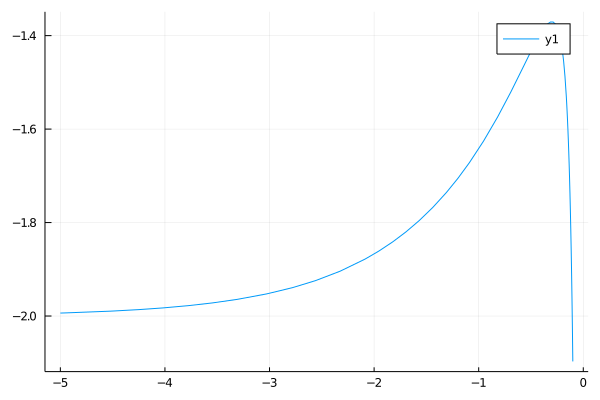

In [221]:
plot(g,-5,-0.1)

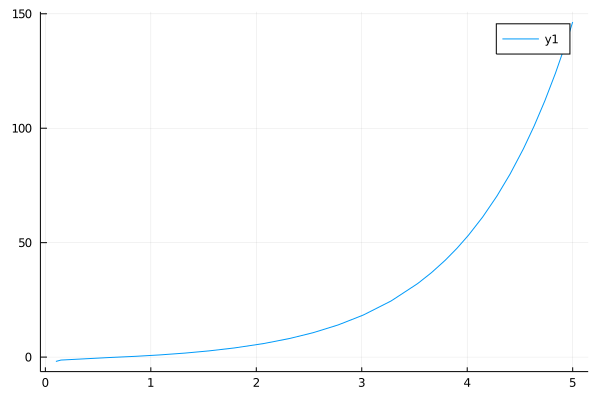

In [222]:
plot(g,0.1,5)

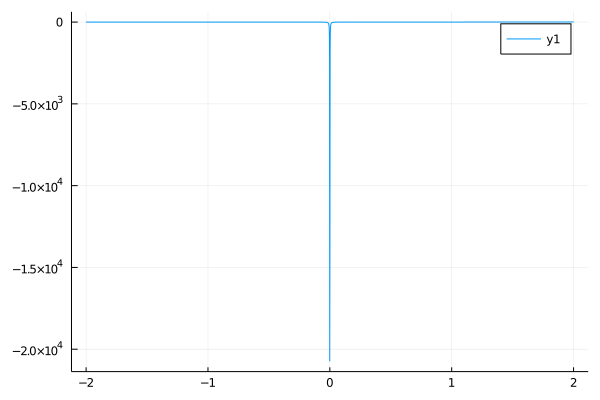

In [229]:
plot(g,-2,2)

In [226]:
x = find_zero(g, (-3, 2),verbose=true)

Results of univariate zero finding:

* Converged to: 2.0
* Algorithm: Roots.BisectionExact()
* iterations: 0
* function evaluations: 3
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Exact zero found

Trace:
(a_0, b_0) = (-3.0000000000000000,  2.0000000000000000)



0.0

In [235]:
x = find_zero((g, D(g), DD(g)), -1, Roots.Halley(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -1.6421225588285577
x_1 =  0.5282908095093333,	 fx_1 = -0.3397860296360309
x_2 =  0.7054913052973755,	 fx_2 =  0.0047552523775257
x_3 =  0.7032048392952278,	 fx_3 = -0.0000000022188006
x_4 =  0.7032048403631358,	 fx_4 =  0.0000000000000002



0.7032048403631358

In [238]:
x = find_zero(g, 0.2, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: 0.7032048403631358
* Algorithm: Roots.Secant()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.2000000000000000,	 fx_0 = -1.0283472418398301
x_1 =  0.4766201227291103,	 fx_1 = -0.4333805671525934
x_2 =  0.6781134008815068,	 fx_2 = -0.0515830585668471
x_3 =  0.7053363118068851,	 fx_3 =  0.0044326122046179
x_4 =  0.7031821180687547,	 fx_4 = -0.0000472098282044
x_5 =  0.7032048196661733,	 fx_5 = -0.0000000430022383
x_6 =  0.7032048403633366,	 fx_6 =  0.0000000000004172
x_7 =  0.7032048403631358,	 fx_7 =  0.0000000000000002



0.7032048403631358

### (Podpunkt 3)

### Metoda siecznych 

In [240]:
g(x) = exp(x) - 2 - 1 / ( 10 * x )^2 + 2 / ( 100 * x )^3 # Funkcja dla ktorej testujemy metode siecznych
x = find_zero(g, -1, Order1(),  verbose=true)

Results of univariate zero finding:

* Converged to: -0.30546863861474094
* Algorithm: Roots.Secant()
* iterations: 16
* function evaluations: 18
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: x_n ≈ x_{n-1}. 

Trace:
x_0 = -1.0000000000000000,	 fx_0 = -1.6421225588285577
x_1 =  3.7204470487986665,	 fx_1 =  39.2821230160329193
x_2 = -0.8105877707040845,	 fx_2 = -1.5706265698550448
x_3 = -0.6363874109097538,	 fx_3 = -1.4954990327483795
x_4 =  2.8312687856052814,	 fx_4 =  14.9657272226645919
x_5 = -0.3213515559055207,	 fx_5 = -1.3717285219963937
x_6 = -0.0566506557736491,	 fx_6 = -4.1820238482893206
x_7 = -0.4505542667778941,	 fx_7 = -1.4120083241900103
x_8 = -0.6513456243813314,	 fx_8 = -1.5022344112571646
x_9 =  2.6917638540383884,	 fx_9 =  12.7563033296358128
x_10 = -0.2991261899382893,	 fx_10 = -1.3703701039138889
x_11 = -0.0089923293631994,	 fx_11 = -127.4269651538968873
x_12 = -0.3022802555269051,	 fx_12 = -1.3703826172719538
x_13 = -0.3054686386147435,	 fx_13 = -1.

LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = -0.30546863861474094. x_n ≈ x_{n-1}. ")[39m

Metoda siecznych ma problem z funkcjami w których wystepują potencjalne nieciągłości. Jak można zauważyć jeśli za punktem początkowym znajduje się nieciągłość, to metoda może nie zwrócić odpowiedzi. Rozwiązaniem problemu jest uruchomienie metody siecznych od innego punktu startowego.

### Metoda Halleya

In [249]:
f(x) = 3*x + 5

f (generic function with 1 method)

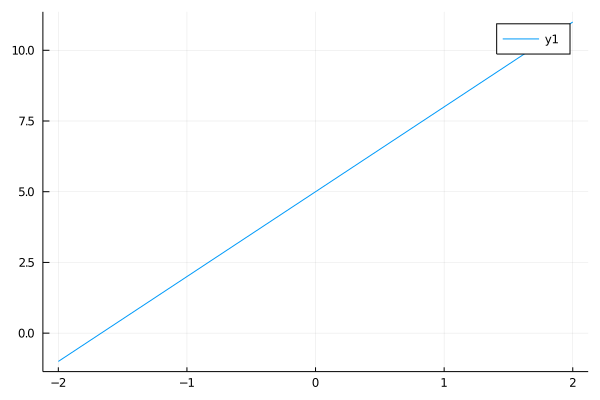

In [250]:
plot(f,-2,2)

In [251]:
x = find_zero((f, D(f), DD(f)), -2, Roots.Halley(), verbose=true)

Results of univariate zero finding:

* Convergence failed: NaN produced by algorithm. 
* Algorithm Roots.Halley()

Trace:
x_0 = -2.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =                NaN,	 fx_1 =                NaN



LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = NaN. NaN produced by algorithm. ")[39m

Metoda Halleya jak widać nie działa poprawnie dla funkcji liniowych. Jest to spowodowane tym, że druga pochodna funkcji liniowej jest równa 0 przez to algorytm nie może poprawnie oszacować miejsca zerowego z powodu dzielenia przez zero. W tym przypadku nalezy zastosować inny algorytm w celu znalezienia rozwiązania.

### Metoda bisekcji

In [252]:
f(x) = x^2 + 3

f (generic function with 1 method)

In [253]:
x = find_zero(f, (-3, 2),verbose=true)

LoadError: [91mArgumentError: The interval [a,b] is not a bracketing interval.[39m
[91mYou need f(a) and f(b) to have different signs (f(a) * f(b) < 0).[39m
[91mConsider a different bracket or try fzero(f, c) with an initial guess c.[39m



Metoda bisekcji nie będzie działać jeśli będziemy działać na przedziale, na którym iloczyn wartości funkcji na krańcach zawsze mają taki sam znak. W takim przypadku metoda bisekcji nie będzie mogła znaleść pierwiastka. Taki przypadek może wystąpić jeśli będziemy działać na funkcji, która nigdy nie osiąga wartości 0 w jakimkolwiek punkcie lub będziemy operować na przedziale, w którym funkcja nigdy nie osiąga wartości 0. 

# Podpunkt B

Kod wykonujący polecenie podpunktu B. Kod został napisany w Pythonie:

    from PIL import Image


def f(z):
    return z**3 - 1.0


def makeFractal(polynomial, border):
    imageX = 1024
    imageY = 1024

    iterations = 66
    epsilon = 0.00001
    h = 0.000001
    fractal = Image.new("RGB", (imageX, imageY))

    lowx = -border
    lowy = -border
    highx = border
    highy = border

    ratioy = (highy - lowy) / (imageY - 1)
    ratiox = (highx - lowx) / (imageX - 1)

    for i in range(imageY):
        for j in range(imageX):
            x = j * ratiox + lowx
            y = i * ratioy + lowy
            z = complex(x, y)
            for k in range(iterations):
                fh = complex(h, h)
                diff = (polynomial(z + fh) - polynomial(z)) / fh
                root = z - f(z) / diff
                if abs(root - z) >= epsilon:
                    z = root
                else:
                    break
            fractal.putpixel((j, i), (k % 4 * 64, k % 8 * 32, k % 16 * 16))

    fractal.save("fractal.jpg")


makeFractal(f, 1.0)
